In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

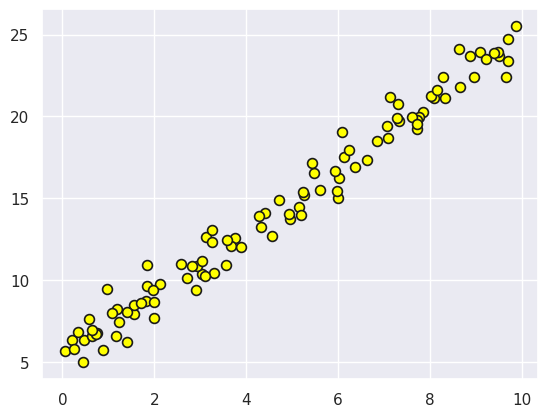

In [3]:
rng = np.random.RandomState(42)
x   = 10*rng.rand(100)
y   = 2*x + 5 + rng.randn(100)

plt.scatter(x, y, s=50, ec='k', fc='yellow', lw=1.2)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X     = x[:,np.newaxis]
model.fit(X,y)

LinearRegression()

In [5]:
Xtest = np.linspace(0,10,100)[:,np.newaxis]
ypred = model.predict(Xtest)

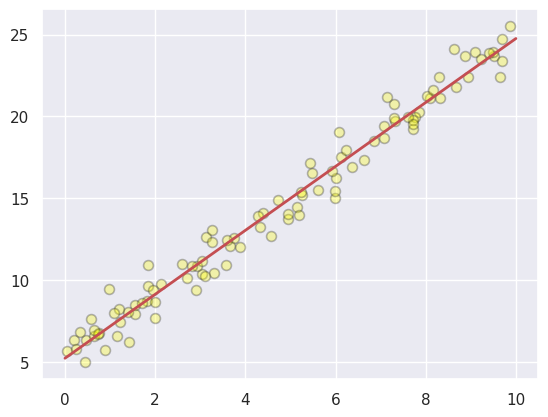

In [6]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)

In [7]:
model.coef_, model.intercept_

(array([1.95402268]), 5.21509615754675)

In [8]:
rng = np.random.RandomState(42)
X   = rng.rand(200,3)
y   = 0.5 + np.dot(X, np.array([1,3,5])[:,np.newaxis])
y.shape

(200, 1)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X,y)

LinearRegression()

In [10]:
model.coef_, model.intercept_

(array([[1., 3., 5.]]), array([0.5]))

In [11]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([2,4,6])[:,np.newaxis]
poly  = PolynomialFeatures(3, include_bias=True)
poly.fit_transform(X)

array([[  1.,   2.,   4.,   8.],
       [  1.,   4.,  16.,  64.],
       [  1.,   6.,  36., 216.]])

In [12]:
poly  = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(X)

array([[  2.,   4.,   8.],
       [  4.,  16.,  64.],
       [  6.,  36., 216.]])

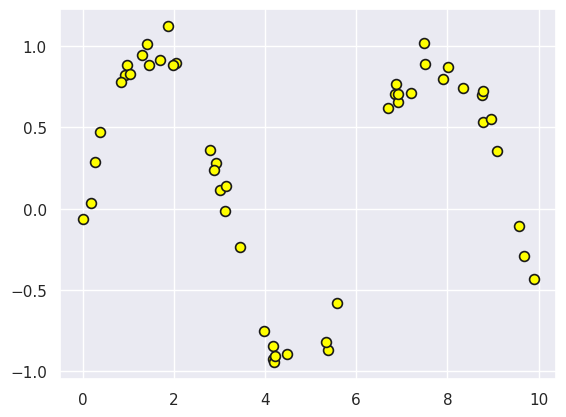

In [13]:
rng = np.random.RandomState(1)
x   = 10*rng.rand(50)
y   = np.sin(x) + 0.1*rng.randn(50)

plt.scatter(x, y, s=50, ec='k', fc='yellow', lw=1.2)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [15]:
model = make_pipeline(PolynomialFeatures(7),
                      LinearRegression(fit_intercept=True))

X     = x[:,np.newaxis]
model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [16]:
Xtest = np.linspace(0,10,100)[:,np.newaxis]
ypred = model.predict(Xtest)

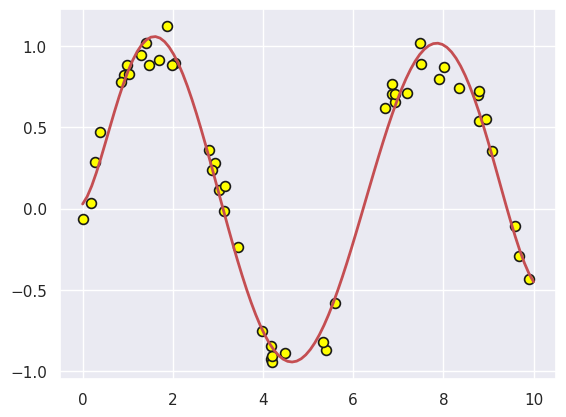

In [17]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """ Uniformly distributed Gaussian feature in one dimension """
  def __init__(self, N, width_factor=2.0):
    self.N            = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=1):
    args  = (x-y)/width
    return np.exp(-0.5 * np.sum(args**2, axis=axis))

  def fit(self, X, y):
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_   = self.width_factor*(self.centers_[1] - self.centers_[0])
    return self

  def transform(self, X):
    return self._gauss_basis(X[:,:,np.newaxis],
                             self.centers_, self.width_, axis=1)

In [19]:
model = make_pipeline(GaussianFeatures(20),
                      LinearRegression(fit_intercept=True))
model.fit(X, y)

Pipeline(steps=[('gaussianfeatures', GaussianFeatures(N=20)),
                ('linearregression', LinearRegression())])

In [20]:
Xtest = np.linspace(0,10,100)[:,np.newaxis]
ypred = model.predict(Xtest)

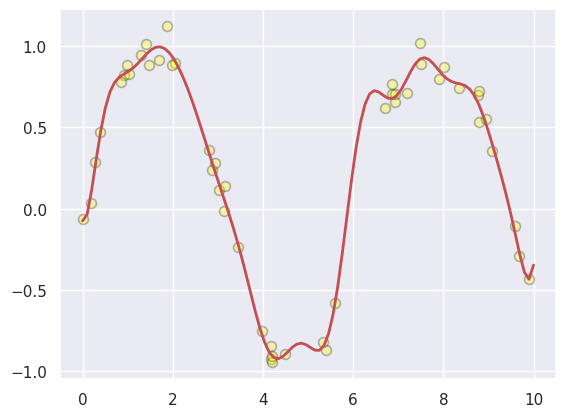

In [21]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)

In [22]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression(fit_intercept=True))
model.fit(X,y)

Pipeline(steps=[('gaussianfeatures', GaussianFeatures(N=30)),
                ('linearregression', LinearRegression())])

In [23]:
Xtest = np.linspace(0,10,100)[:,np.newaxis]
ypred = model.predict(Xtest)

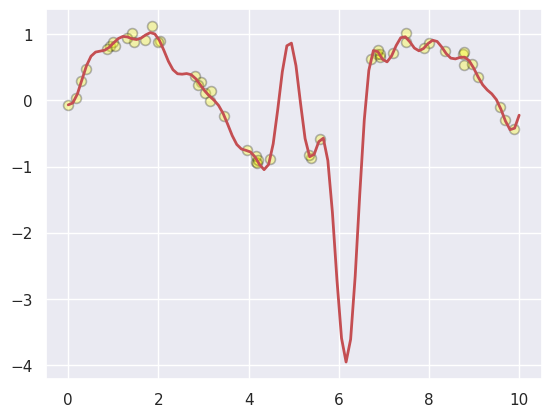

In [24]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)

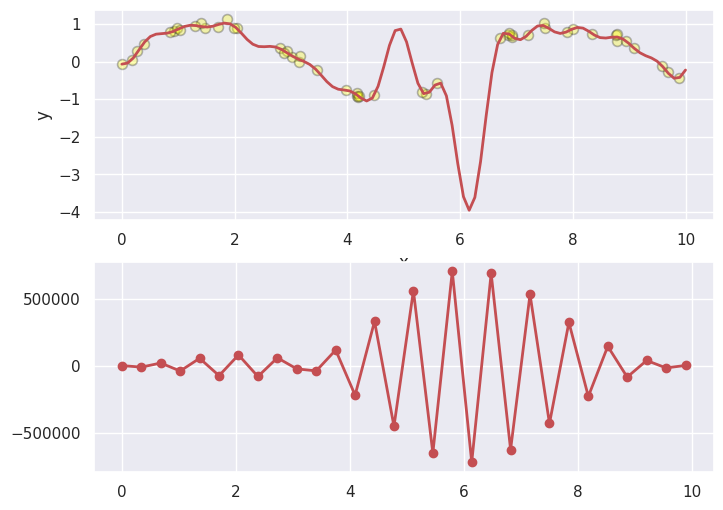

In [25]:
def basis_plot(model, X, y):
  fig,ax  = plt.subplots(2,1, figsize=(8,6))

  model.fit(X,y)
  Xtest = np.linspace(0,10,100)[:,np.newaxis]
  ypred = model.predict(Xtest)

  ax[0].scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)
  ax[0].plot(Xtest.ravel(), ypred, '-r', lw=2.0)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')

  ax[1].plot(model.steps[0][1].centers_,
             model.steps[1][1].coef_,
             '-or', lw=2.0)

basis_plot(model, X, y)

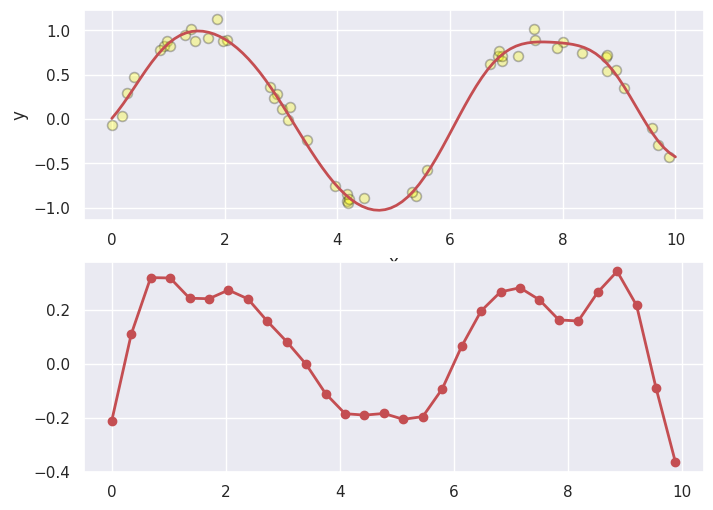

In [26]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30),
                      Ridge(alpha=0.1))
basis_plot(model, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


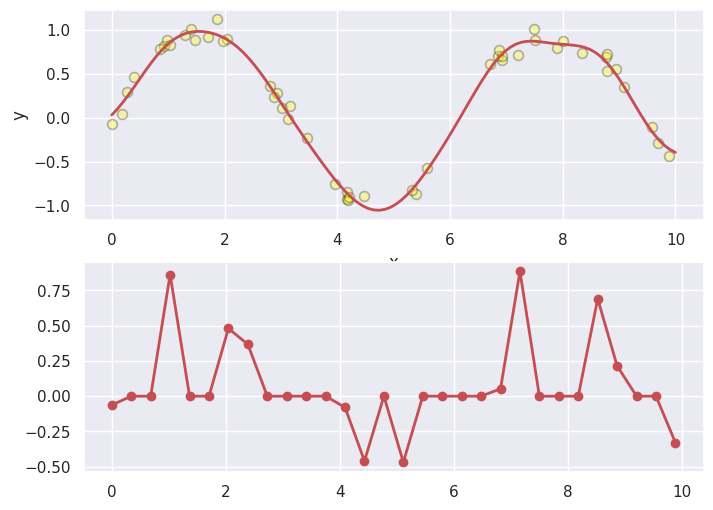

In [27]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30),
                      Lasso(alpha=0.001))
basis_plot(model, X, y)